![logo](../.././docs/images/Logo_Destination_Earth_Colours.png)

## Polytope nextGEMS historical 1990-2020 example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull nextGEMS data from LUMI and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [2]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [3]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [1]:
import earthkit.data
import earthkit.plots
import earthkit.regrid
from polytope.api import Client

In [3]:
request = {
    'class':'ng',
    'activity':'cmip6',
    'experiment':'hist',
    'generation':'1',
    'model':'ifs-fesom',
    'realization':'1',
    'expver':'0001',
    'stream':'clte',
    'year':'2000',
    'month':'1',
    'resolution':'high',
    'type':'fc',
    'levtype':'sfc',
    'date':'20000101',
    'param':'167',
    'time':'0000'
}

In [ ]:
data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)

In [5]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,heightAboveGround,2,20000101,0,0,fc,None,healpix


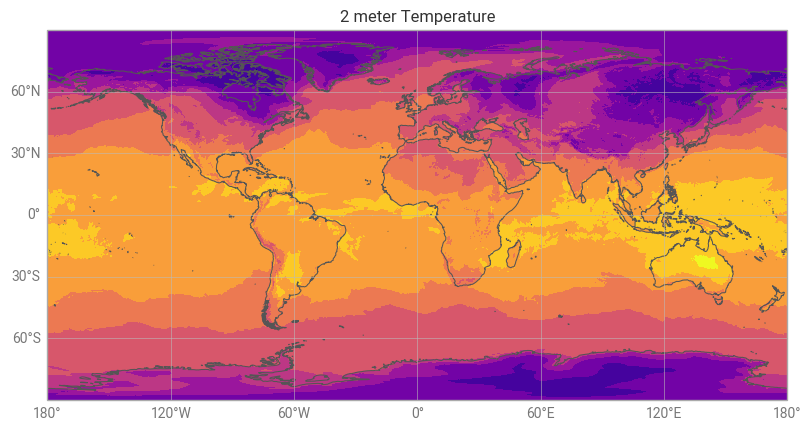

In [6]:
chart = earthkit.plots.Map(extent=[-180, 180, -90, 90])
chart.grid_cells(
    data[0],
)

chart.title('2 meter Temperature')
chart.coastlines()
chart.gridlines()
chart.show()

In [7]:
# Regrid t=from healpix for conversion to xarray
data_latlon = earthkit.regrid.interpolate(data, out_grid={"grid": [1,1]}, method="linear")
# Convert data to xarray
data_latlon.to_xarray()

<xarray.Dataset> Size: 526kB
Dimensions:    (latitude: 181, longitude: 360)
Coordinates:
  * latitude   (latitude) float64 1kB 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude  (longitude) float64 3kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
Data variables:
    2t         (latitude, longitude) float64 521kB ...
Attributes:
    param:        2t
    paramId:      167
    class:        ng
    stream:       clte
    levtype:      sfc
    type:         fc
    expver:       0001
    date:         20000101
    time:         0
    Conventions:  CF-1.8
    institution:  ECMWF